In [1]:
from keras import datasets,Sequential,layers,utils,preprocessing
import numpy as np
import matplotlib.pyplot as plt

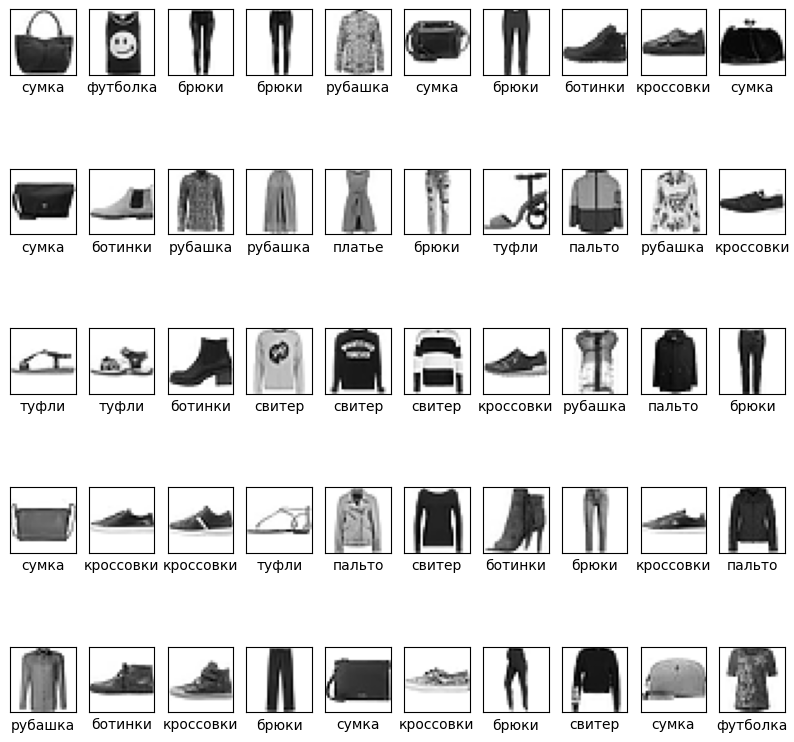

In [5]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
classes =['футболка','брюки','свитер','платье','пальто','туфли',
'рубашка','кроссовки','сумка','ботинки']
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-99)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [6]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train/255
x_test=x_test/255

In [7]:
print(y_train[0])

9


In [8]:
y_train=utils.to_categorical(y_train,10)
y_test=utils.to_categorical(y_test,10)
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [14]:
model=Sequential()
model.add(layers.Dense(800,activation='relu',input_shape=(784,)))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
history=model.fit(x_train,y_train,epochs=20,verbose=1,validation_split=0.2,batch_size=200)

Epoch 1/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6476 - loss: 1.2033 - val_accuracy: 0.7446 - val_loss: 0.8408
Epoch 2/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7601 - loss: 0.7673 - val_accuracy: 0.7788 - val_loss: 0.6960
Epoch 3/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7894 - loss: 0.6685 - val_accuracy: 0.7967 - val_loss: 0.6304
Epoch 4/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8041 - loss: 0.6150 - val_accuracy: 0.8044 - val_loss: 0.5916
Epoch 5/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8132 - loss: 0.5803 - val_accuracy: 0.8128 - val_loss: 0.5672
Epoch 6/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8195 - loss: 0.5557 - val_accuracy: 0.8190 - val_loss: 0.5445
Epoch 7/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8252 - loss: 0.5368 - val_accuracy: 0.8219 - val_loss: 0.5275
Epoch 8/20
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8285 - loss: 0.5217 - val_accuracy: 0.

In [18]:
model.save('fashion_mnist_dense.keras')

In [19]:
scores=model.evaluate(x_test,y_test,verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8374 - loss: 0.4705


In [20]:
print(round(scores[1]*100,4))

83.74


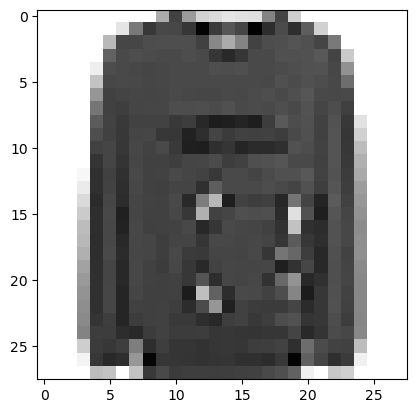

In [21]:
plt.imshow(x_test[46].reshape(28,28),cmap=plt.cm.binary)
plt.show()

In [22]:
x=x_test[46]
x=np.expand_dims(x,axis=0)
pred=model.predict(x)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([[3.3414785e-02, 1.6209097e-03, 7.0752436e-01, 2.2882537e-03,
        1.7603319e-02, 2.0404575e-06, 2.3180088e-01, 1.5750766e-08,
        5.7453173e-03, 2.3917630e-07]], dtype=float32)

In [23]:
pred=np.argmax(pred[0])
print('Номер класса:',pred)
print('Название класса:',classes[pred])

Номер класса: 2
Название класса: свитер


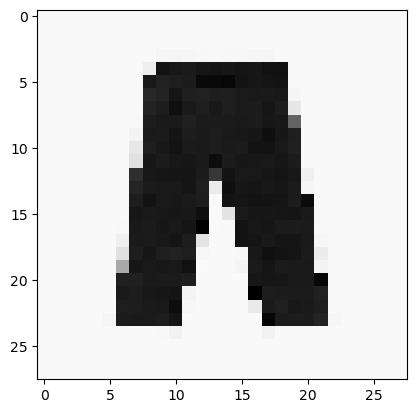

In [31]:
img=preprocessing.image.load_img('swits.jpg',target_size=(28,28),color_mode='grayscale')
plt.imshow(img.convert('RGBA'))
plt.show()

In [32]:
x=preprocessing.image.img_to_array(img)
x=x.reshape((1,784))
x=255-x
x/=255
prediction=model.predict(x)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


array([[2.78393980e-02, 7.36320853e-01, 1.91090675e-03, 4.88490681e-04,
        1.89013585e-01, 1.14162314e-04, 1.82621367e-02, 2.10977218e-04,
        2.58309897e-02, 8.45564500e-06]], dtype=float32)

In [33]:
prediction=np.argmax(prediction)
print('Номер класса:',prediction)
print('Название класса:',classes[prediction])

Номер класса: 1
Название класса: брюки
